In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
from sklearn.datasets import make_circles
import time
from IPython.display import clear_output

Using TensorFlow backend.


[0.02060408 0.0347557 ]
0


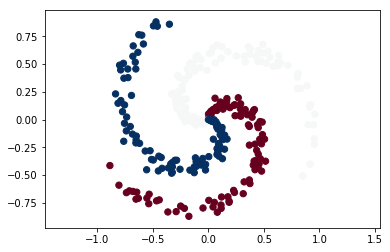

In [12]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y_orig = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_orig[ix] = j
fig = plt.figure()
print(X[4])
print(y_orig[4])
plt.scatter(X[:, 0], X[:, 1], c=y_orig, s=40, cmap=plt.cm.get_cmap('RdBu'))
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.axis("equal")
plt.show()

In [3]:
print(y_orig.shape)
#np.newaxis permite añadir un eje nuevo
Y_ = y_orig[:, np.newaxis]
Y_.shape

(300,)


(300, 1)

In [4]:
def one_hot(arr):
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))
y_ohe=one_hot(Y_)

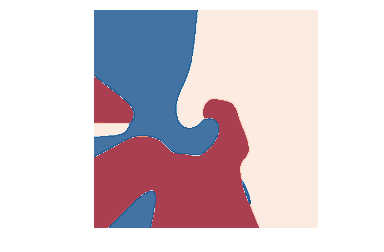

Accuracy: 99.00%


In [10]:
nHidden = 100

x = tf.placeholder(tf.float32,[None, 2]) # tienes dos valores de entrada
y_ = tf.placeholder(tf.float32, [None, 3]) # hay dos etiquetas

W0 = tf.Variable(tf.random_normal([2, nHidden],stddev=0.01))
b0 = tf.Variable(tf.random_normal([nHidden],stddev=0.01))

W1 = tf.Variable(tf.random_normal([nHidden, 3],stddev=0.01))
b1 = tf.Variable(tf.random_normal([3],stddev=0.01))

h = tf.nn.tanh(tf.matmul(x, W0) + b0)
y = tf.nn.tanh(tf.matmul(h, W1) + b1)


mse_loss = tf.reduce_mean(tf.square(y_-y))
train_step = tf.train.AdamOptimizer(0.005).minimize(mse_loss)

Produccion = tf.argmax(y,1)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


testPerformance = []
trainPerformance = []

for i in range(1500): 
    sess.run(train_step, feed_dict={x: X, y_: y_ohe})
    trainPerformance.append(sess.run(mse_loss,feed_dict={x: X, y_: y_ohe}))   
    if i% 10 == 0:
      #print(y)

      h = 0.01
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

      Z = sess.run(Produccion, feed_dict={x:np.c_[xx.ravel(), yy.ravel()]})
      Z = Z.reshape(xx.shape)
      
      clear_output(wait=True)
      
      cmap = plt.cm.get_cmap('RdBu')
      
      fig = plt.figure()
      plt.contourf(xx, yy, Z, cmap = cmap , alpha=0.8)
      #plt.scatter(X[:, 0], X[:, 1], c=y_ohe, s=40, cmap=cmap)
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.axis("equal")
      plt.axis("off")
      plt.show()
        
      print("Accuracy: {:.2f}%".format(100 * np.mean(y_orig == sess.run(Produccion, feed_dict={x: X}))))

      time.sleep(0.2)
      nombre = "png/spiral_raw" + str(i) + ".png"
      fig.savefig(nombre)

In [9]:
fig.savefig('spiral_raw.png')